In [1]:
# Here, we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps us handling arrays of numbers
import numpy as np

# We use this function to calculate the fft
from numpy.fft import fft, ifft

# This shifts the output of the fft so that zero frequency is at the centre
from numpy.fft import fftshift

# The inverse of fftshift 
from numpy.fft import ifftshift

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from scipy import signal

from scipy.io import wavfile

import IPython.display as ipd

#### Using the file './Jungle-SoundBible.com-1211567897.wav' We are gonna Print the number of samples, the length of the file in seconds, and the sample rate.Then after listening to the audio we will plot the time series, the spectrum, and the spectrogram.

22050 (119808, 2)
number of samples: 119808
length of file in seconds: 5.433469387755102
sample rate: 22050


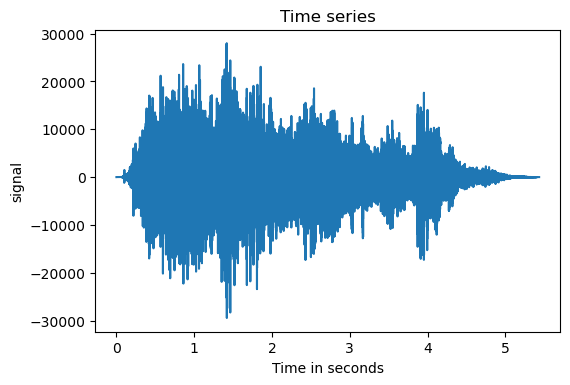

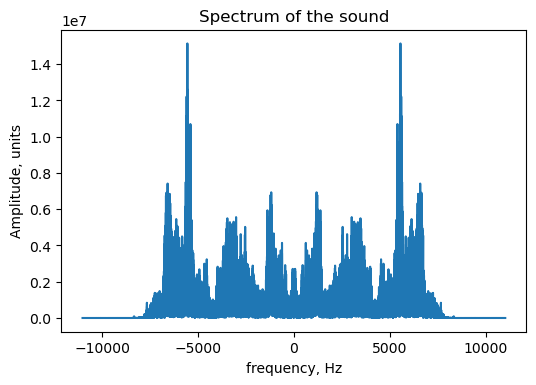

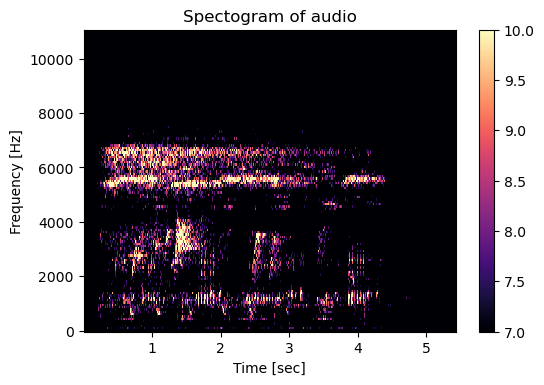

In [3]:
# loading the wav file
samp_rate, sound_data = wavfile.read("Jungle-SoundBible.com-1211567897.wav")

print(samp_rate, sound_data.shape)

# we use only one of the channels
sound_data = sound_data[:,0]

# printing some stats
num_of_samples = len(sound_data)
len_in_seconds = len(sound_data)/samp_rate
print("number of samples:", num_of_samples)
print("length of file in seconds:", len_in_seconds)
print("sample rate:", samp_rate)

# We can use this to play the file
ipd.Audio(sound_data, rate = samp_rate ) # load a local WAV file


# plotting the signal
# To get the x-axis in seconds
x = np.arange(num_of_samples) / samp_rate
plt.plot(x, sound_data)
plt.title("Time series")
plt.xlabel("Time in seconds")
plt.ylabel("signal")
plt.show()

#For plotting the spectrum
# first applying FFT
sound_data_FFT = fftshift(fft(sound_data))
freq = np.arange(sound_data.size)
freq = freq - (sound_data.size)//2
freq = freq/len_in_seconds


plt.plot(freq, np.abs(sound_data_FFT))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.title("Spectrum of the sound")
plt.show()



#Spectogram
f, t, Sxx = signal.spectrogram(sound_data, samp_rate)


plt.pcolormesh(t, f, np.log(Sxx),cmap = "magma", vmin=7, vmax=10)
plt.ylabel("Frequency [Hz]")

plt.xlabel("Time [sec]")
plt.title("Spectogram of audio")
plt.colorbar()

plt.show()
ipd.Audio(sound_data, rate = samp_rate )

#### Looks like this audio file contains sounds produced by different animals. Now we will try to identify which parts of the spectrum belong to different animals. For this we will design 3 different filters that each isolate the sound produced by 3 types of animals. 

#### Each filter should roughly conserve only the frequency range of one animal type and remove all other frequencies above and below that range.
#### We will use 'plt.xlim' and 'plt.ylim' to zoom in on different parts of the spectrogram and find the correct parts of the spectrum. Furthermore we will change 'vmin' and 'vmax' to find the animals.

#### After filtering the signal, we are gonna listen to the results to make sure that we have roughly isolated the animal. 
### Finally, we will make one spectrogram for each filtered signal.

-----FOR ANIMAL 1------


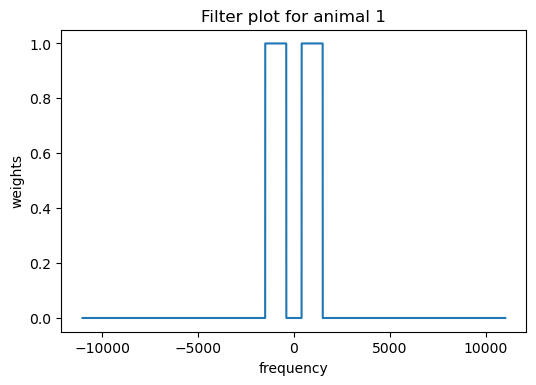

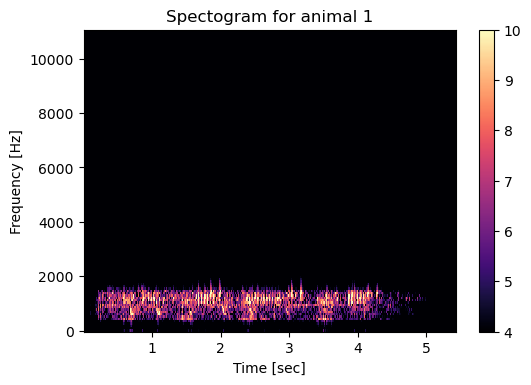

----------------------------------------------------------------
-----FOR ANIMAL 2------


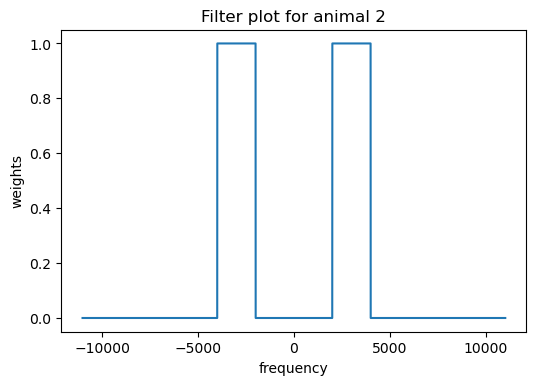

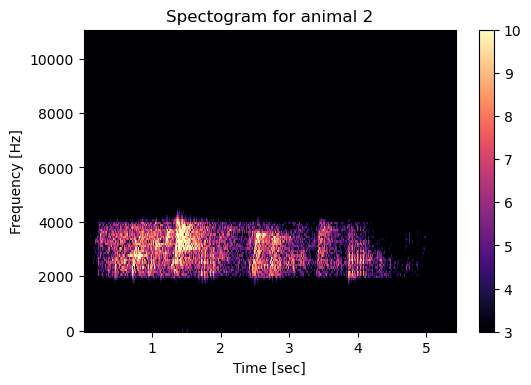

----------------------------------------------------------------
-----FOR ANIMAL 3------


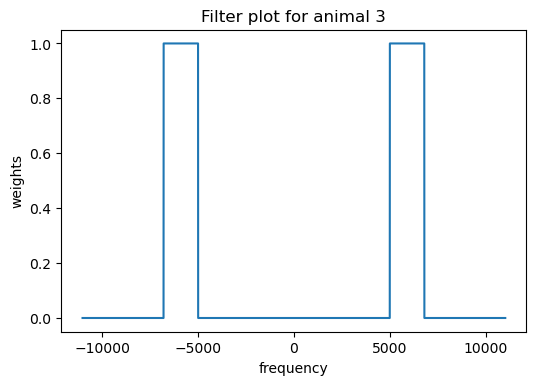

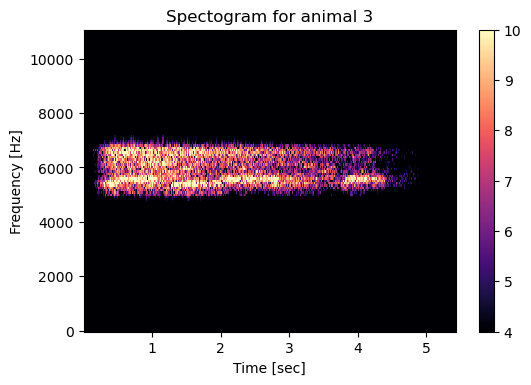

animal 1 sound


animal 2 sound


animal 3 sound


In [4]:
#For Animal 1
print("-----FOR ANIMAL 1------")
freq_min = 400
freq_max = 1500

# We are building a brickwall filter that
# will retain all frequencies between 400 and 1500 


# We start with an array of zeros
weights = np.zeros(len(freq))

# This will set all the frequencies we want to keep to 1
weights[(freq >= freq_min) & (freq <= freq_max)] = 1

# We also have to consider the negative frequencies
weights[(freq <= -freq_min) & (freq >= -freq_max)] = 1

# Let's plot the filter 
plt.plot(freq, weights)
plt.xlabel("frequency")
plt.ylabel("weights")
plt.title("Filter plot for animal 1")
plt.show()

# Multiplication of the filter 

sound_data_FFT_filtered = sound_data_FFT*weights



# we have to first apply the inverse fftshift
sound_data_FFT_fBack = ifftshift(sound_data_FFT_filtered)

# now we apply the inverse FFT
animal_one_reconstructed = ifft(sound_data_FFT_fBack)

# The imaginary part is zero (up to numerical accuracy)
animal_one_reconstructed = animal_one_reconstructed.real

# Plotting Spectogram reconstucted sound

f, t, Sxx = signal.spectrogram(animal_one_reconstructed, samp_rate)

plt.pcolormesh(t, f, np.log(Sxx),cmap = "magma", vmin=4, vmax=10)
plt.ylabel("Frequency [Hz]")

plt.xlabel("Time [sec]")

plt.colorbar()
plt.title("Spectogram for animal 1")
plt.show()




#For Animal 2
print("----------------------------------------------------------------")
print("-----FOR ANIMAL 2------")

freq_min = 2000
freq_max = 4000

# We are building a brickwall filter that
# will retain all frequencies between 2000 and 4000 


# We start with an array of zeros
weights = np.zeros(len(freq))

# This will set all the frequencies we want to keep to 1
weights[(freq >= freq_min) & (freq <= freq_max)] = 1

# We also have to consider the negative frequencies
weights[(freq <= -freq_min) & (freq >= -freq_max)] = 1

# Let's plot the filter 
plt.plot(freq, weights)
plt.xlabel("frequency")
plt.ylabel("weights")
plt.title("Filter plot for animal 2")
plt.show()

# Multiplication of the filter 

sound_data_FFT_filtered = sound_data_FFT*weights



# we have to first apply the inverse fftshift
sound_data_FFT_fBack = ifftshift(sound_data_FFT_filtered)

# now we apply the inverse FFT
animal_two_reconstructed = ifft(sound_data_FFT_fBack)

# The imaginary part is zero (up to numerical accuracy)
animal_two_reconstructed = animal_two_reconstructed.real

# Plotting Spectogram reconstucted sound

f, t, Sxx = signal.spectrogram(animal_two_reconstructed, samp_rate)

plt.pcolormesh(t, f, np.log(Sxx),cmap = "magma", vmin=3, vmax=10)
plt.ylabel("Frequency [Hz]")

plt.xlabel("Time [sec]")
plt.title("Spectogram for animal 2")
plt.colorbar()

plt.show()






#For Animal 3
print("----------------------------------------------------------------")
print("-----FOR ANIMAL 3------")

freq_min = 5000
freq_max = 6800

# We are building a brickwall filter that
# will retain all frequencies between 5000 and 6800 


# We start with an array of zeros
weights = np.zeros(len(freq))

# This will set all the frequencies we want to keep to 1
weights[(freq >= freq_min) & (freq <= freq_max)] = 1

# We also have to consider the negative frequencies
weights[(freq <= -freq_min) & (freq >= -freq_max)] = 1

# Let's plot the filter 
plt.plot(freq, weights)
plt.xlabel("frequency")
plt.ylabel("weights")
plt.title("Filter plot for animal 3")
plt.show()

# Multiplication of the filter 

sound_data_FFT_filtered = sound_data_FFT*weights



# we have to first apply the inverse fftshift
sound_data_FFT_fBack = ifftshift(sound_data_FFT_filtered)

# now we apply the inverse FFT
animal_three_reconstructed = ifft(sound_data_FFT_fBack)

# The imaginary part is zero (up to numerical accuracy)
animal_three_reconstructed = animal_three_reconstructed.real

# Plotting Spectogram reconstucted sound

f, t, Sxx = signal.spectrogram(animal_three_reconstructed, samp_rate)

plt.pcolormesh(t, f, np.log(Sxx),cmap = "magma", vmin=4, vmax=10)
plt.ylabel("Frequency [Hz]")

plt.xlabel("Time [sec]")
plt.title("Spectogram for animal 3")
plt.colorbar()

plt.show()

print("animal 1 sound")

display(ipd.Audio(animal_one_reconstructed, rate = samp_rate ))


print("animal 2 sound")
display(ipd.Audio(animal_two_reconstructed, rate = samp_rate ))

print("animal 3 sound")
ipd.Audio(animal_three_reconstructed, rate = samp_rate )

### To perform smoothing on this signal
#### Now we will  Create a Gaussian filter for one of the animals that transitions more smoothly between areas of the spectrum that are removed and  retained. 
#### We will Plot the filter weights and come up with a Spectogram as well

Applying Gaussian Filter for animal 3


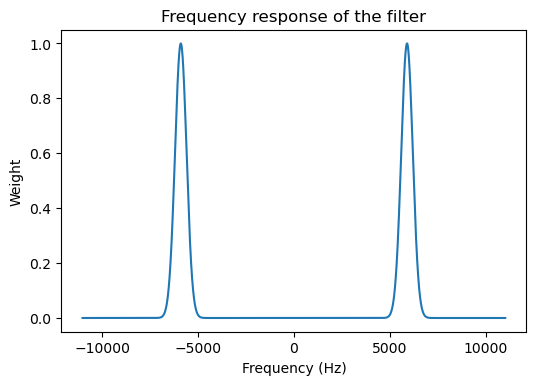

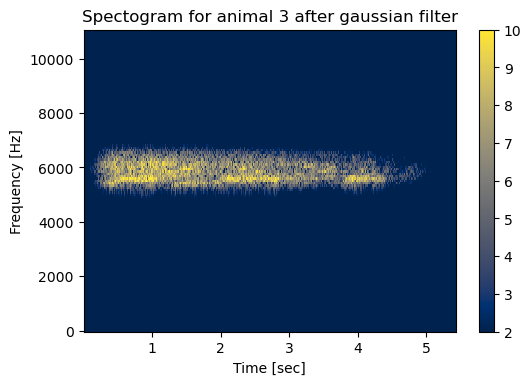

In [5]:
print("Applying Gaussian Filter for animal 3")
freq_min = 5000
freq_max = 6800

# Calculate the center frequency and width of the Gaussian
fc = (freq_min + freq_max) / 2
sigma = (freq_max - freq_min) / 6

# Calculate the Gaussian weights for each frequency
weights = np.exp(-((np.abs(freq) - np.abs(fc))**2) / (2*sigma**2))

# Let's plot the filter 
plt.plot(freq, weights)
plt.title("Frequency response of the filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Weight")
plt.show()



sound_data_FFT_filtered = sound_data_FFT*weights



# we have to first apply the inverse fftshift
sound_data_FFT_fBack = ifftshift(sound_data_FFT_filtered)

# now we apply the inverse FFT
animal_three_reconstructed_gauss = ifft(sound_data_FFT_fBack)


animal_three_reconstructed_gauss = animal_three_reconstructed_gauss.real

# Plotting Spectogram of reconstucted sound from gaussian

f, t, Sxx = signal.spectrogram(animal_three_reconstructed_gauss, samp_rate)

plt.pcolormesh(t, f, np.log(Sxx),cmap = "cividis", vmin=2, vmax=10)
plt.ylabel("Frequency [Hz]")

plt.xlabel("Time [sec]")
plt.title("Spectogram for animal 3 after gaussian filter")
plt.colorbar()

plt.show()

ipd.Audio(animal_three_reconstructed_gauss, rate = samp_rate )